### Исходные параметры дрона

Технические характеристики:
  - время работы аккумулятора: 25 минут
  - максимальная скорость $XY$: $10 \frac{\text{м}}{\text{c}}$
  - максимальная скорость $Z$: $2 \frac{\text{м}}{\text{c}}$
  - расход жидкости:  $50 \frac{\text{л}}{\text{ч}}$
  - объем бака: $10$ л
  - след рассеивания удобрения: $+1$м от крайней форсунки
  - длина штанги с форсунками: $2$ м
  - время снаряжения коптера (аккумулятор + долив удобрения): $3$ минуты
  - допустимая дистанция между дронами: $3$ м (точность GPS $1$ м)
  - скорость углового поворота: $\frac{\pi}{4} \frac{\text{рад}}{\text{с}}$
  - максимальное развиваемое ускорение: $1 \frac{\text{м}}{\text{с}^2}$
  
Веса ресурсов:
  - аккум : $35%$
  - удобр : $15%$
  - время : $50%$

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import shapely.geometry as shg

In [85]:
#Coordinates from KML file
x1 = [45.91043204152349,50.50752024855144]
x2 = [45.90929808523507,50.50737081218062]
x3 = [45.90721698424876,50.50676072184594]
x4 = [45.90506986198657,50.5057890410317]
x5 = [45.90767218680866,50.50375778662693]
x6 = [45.91184648100185,50.50651414134762]
x7 = [45.91043204152349,50.50752024855144]

# Изобразим наше поле, представляющее собой выпуклый шестиугольник

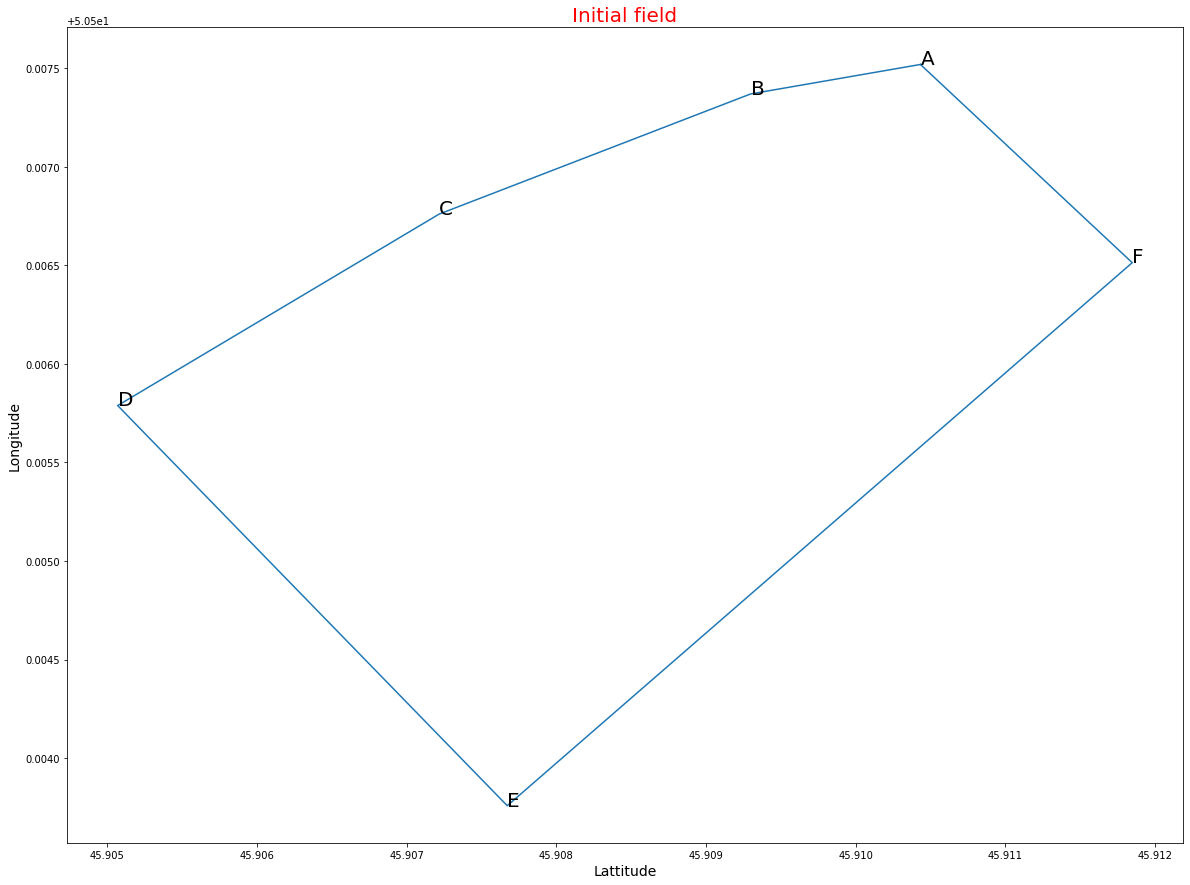

In [93]:
field = shg.Polygon([x1, x2, x3, x4, x5, x6, x7])

fig = plt.figure(figsize=(20, 15))

plt.plot(*field.exterior.xy)
plt.annotate("A", (x1[0], x1[1]), fontsize=20)
plt.annotate("B", (x2[0], x2[1]), fontsize=20)
plt.annotate("C", (x3[0], x3[1]), fontsize=20)
plt.annotate("D", (x4[0], x4[1]), fontsize=20)
plt.annotate("E", (x5[0], x5[1]), fontsize=20)
plt.annotate("F", (x6[0], x6[1]), fontsize=20)

plt.xlabel("Lattitude", fontsize=14)
plt.ylabel("Longitude", fontsize=14)

plt.title("Initial field", color='red', fontsize=20)

plt.show()

Основная идея - осуществить полёт дронов вдоль наиболее протяжённого участка поля (параллельно границе поля $EF$). Заряда батарейки хватает на $25$ минут, в то время как ёмкости с поливательной смесью - на $\frac{10}{50}\cdot60=12$ минут. Следовательно, для наиболее быстрого полива стоит максимально эффективно расходовать именно поливательную жидкость. 

Ширина поливательной полосы коптера (считаем, что он поднялся на требуемую высоту) - $6$ метров. Однако нужно учесть, что есть погрешность GPC величиной $1$ метр. На основании этого, было предложено 2 модели.

1. Считаем, что эффективная ширина полива дрона - 5 метров. В таком случае нужно разбивать границу $DE$ на 72 части и от точек разбива строить прямые, параллельные $EF$.

x1 = [45.91043204152349,50.50752024855144]
x2 = [45.90929808523507,50.50737081218062]
x3 = [45.90721698424876,50.50676072184594]
x4 = [45.90506986198657,50.5057890410317]
x5 = [45.90767218680866,50.50375778662693]
x6 = [45.91184648100185,50.50651414134762]
x7 = [45.91043204152349,50.50752024855144]

In [37]:
x1 = [45.91043204152349,50.50752024855144]
x2 = [45.90929808523507,50.50737081218062]
x3 = [45.90721698424876,50.50676072184594]
x4 = [45.90506986198657,50.5057890410317]
x5 = [45.90767218680866,50.50375778662693]
x6 = [45.91184648100185,50.50651414134762]
x7 = [45.91043204152349,50.50752024855144]

In [56]:
#fig = plt.figure(figsize=(12, 9))

#X = [45.91043204152349, 45.90929808523507, 45.90721698424876, 
#     45.90506986198657, 45.90767218680866, 45.91184648100185, 45.91043204152349]
#Y = [50.50752024855144, 50.50737081218062, 50.50676072184594, 
#     50.5057890410317, 50.50375778662693, 50.50651414134762, 50.50752024855144]

#plt.scatter(X,Y,color='r', s=4)
#plt.scatter(x1[0], x1[1])
#plt.scatter(x6[0], x6[1])
#plt.plot(X,Y,color='b')

#plt.show()

In [57]:
def line(x1, x2):
    k = (x1[1] - x2[1]) / (x1[0] - x2[0])
    b = x2[1] - k * x2[0]
    return k, b

In [69]:
k_main, b_main = line(x5, x6)

print("k of line for division: ", k_main)

k of line for division:  0.6603163536463279


## Отрезок между $x_4$ и $x_5$ нужно разбить на 72 равные части. Это составит полосы шириной примерно 4 метра.


In [73]:
dx = (x5[0] - x4[0]) / 72.0
dy = (x5[1] - x4[1]) / 72.0

interm_points_x = [x4[0] + i * dx for i in range(1, 73)]
interm_points_y = [x4[1] + i * dy for i in range(1, 73)]

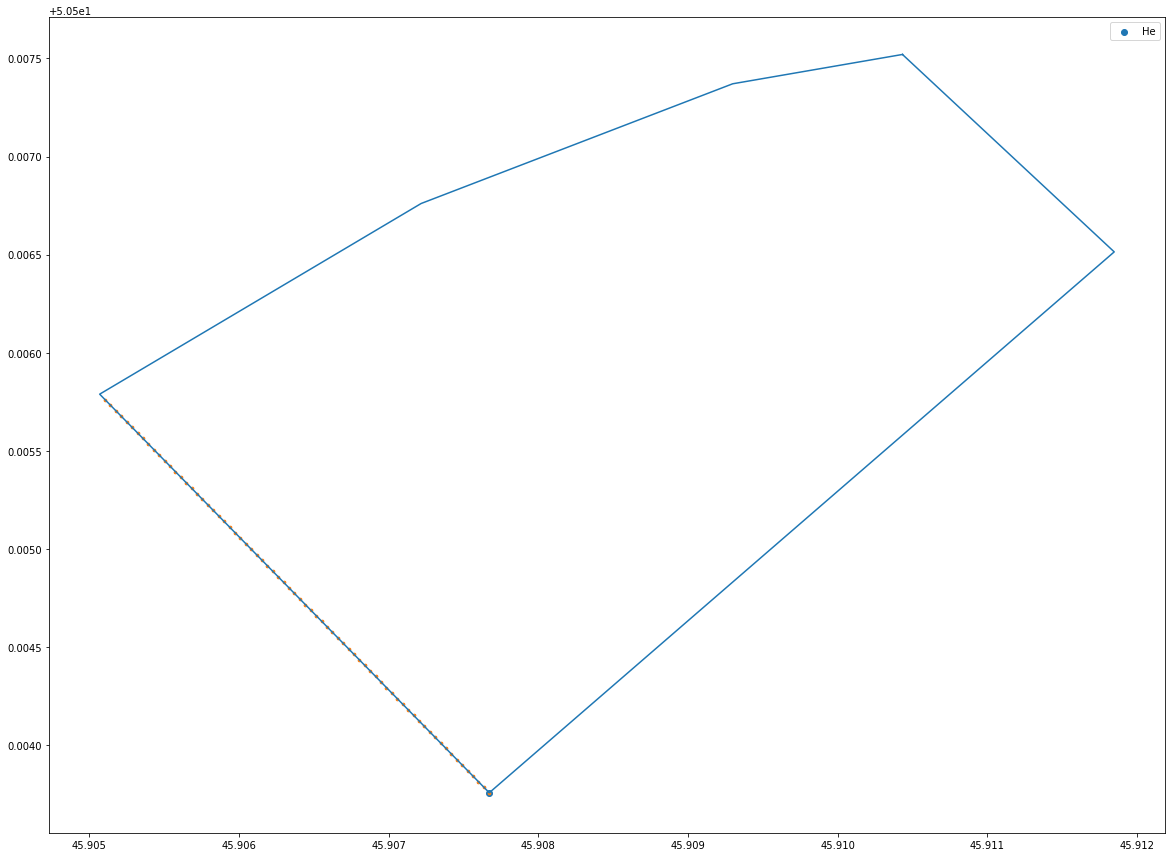

In [87]:
field = shg.Polygon([x1, x2, x3, x4, x5, x6, x7])

fig = plt.figure(figsize=(20, 15))

plt.plot(*field.exterior.xy)
plt.scatter(x5[0], x5[1], label="He")
plt.scatter(interm_points_x, interm_points_y, s=7)

plt.legend()

plt.show()

In [64]:
field.area

1.2684817930772573e-05

### Пропишем функцию для распечатки точки полетного задания в двух вариантах

In [ ]:
def control_point(Number, Type, Lat, Lon, Alt, Radius, WaitTime, MaxHSpeed, MaxVSpeed, 
                  POILat, POILon, POIAltitude, POIHeading, POIPitch, POIRoll, Flg1, Photo, PanoSectors, Delta):
    point = "["
    point += str(Number) + "]"+"\n"
    point += "Type="+str(Type) + "\n"
    point += "Lat="+str(Lat) + "\n"
    point += "Lon="+str(Lon) + "\n"
    point += "Alt="+str(Alt) + "\n"
    point += "Radius="+str(Radius) + "\n"
    point += "WaitTime="+str(WaitTime) + "\n"
    point += "MaxHSpeed="+str(MaxHSpeed) + "\n"
    point += "MaxVSpeed="+str(MaxVSpeed) + "\n"
    point += "POILat="+str(POILat) + "\n"
    point += "POILon="+str(POILon) + "\n"
    point += "POIAltitude="+str(POIAltitude) + "\n"
    point += "POIHeading="+str(POIHeading) + "\n"
    point += "POIPitch="+str(POIPitch) + "\n"
    point += "POIRoll="+str(POIRoll) + "\n"
    point += "Flg1="+str(Flg1) + "\n"
    point += "Photo="+str(Photo) + "\n"
    point += "PanoSectors="+str(PanoSectors) + "\n"
    point += "Delta="+str(Delta) + "\n"
    return point

In [ ]:
print(control_point(Number=0, 
              Type="NAVI_POINT_TAKEOFF", 
              Lat=55.65165099,
              Lon=37.536942, 
              Alt=6.0, 
              Radius=2.0, 
              WaitTime=2.0, 
              MaxHSpeed=6.0, 
              MaxVSpeed=2.0, 
              POILat=0, 
              POILon=0, 
              POIAltitude=0, 
              POIHeading=0, 
              POIPitch=-90.0, 
              POIRoll=0, 
              Flg1=160, 
              Photo=0, 
              PanoSectors=0, 
              Delta=0))

In [ ]:
def control_point_2 (number, x2, x3, x4, x5, x6, x7, x8, lat, lon, x11, x12):
    point = str(number) + "\t"
    point += str(x2) +"\t"
    point += str(x3) +"\t"
    point += str(x4) +"\t"
    point += str(x5) +"\t"
    point += str(x6) +"\t"
    point += str(x7) +"\t"
    point += str(x8) +"\t"
    point += str(lat) +"\t"
    point += str(lon) +"\t"
    point += str(x11) +"\t"
    point += str(x12) +"\t"
    return point

In [ ]:
print(control_point_2(0, 1, 0, 16, 2.0, 0, 0, 0, 55.651651, 37.536942, 0.000000, 1))